In [12]:
!pip install transformers

In [1]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [2]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds
  


# # Open the image file
# with open('D:\\Major23\\ig.png', 'rb') as f:
#     img = Image.open(f)


# predict_step(['D:\\Major23\\ig.png'])

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


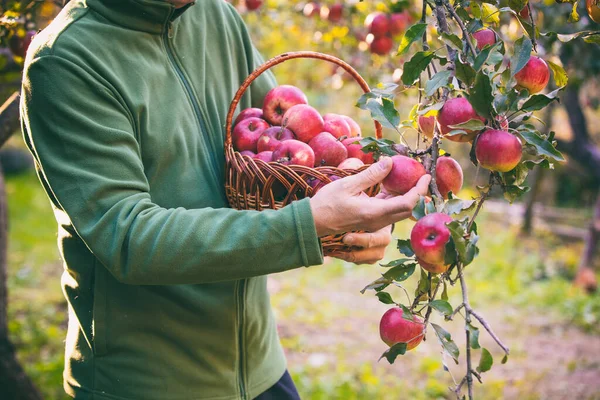

In [3]:
from IPython.display import Image
Image("C:\\Users\\admin\\Desktop\\SCET_Major\\img1.jpg") # replace filename.jpg with the name of your image file


In [4]:
from PIL import Image
# Open the image file
with open('C:\\Users\\admin\\Desktop\\SCET_Major\\img1.jpg', 'rb') as f:
    img = Image.open(f)

# Show the image
predict_step(['C:\\Users\\admin\\Desktop\\SCET_Major\\img1.jpg'])

['a woman holding a bunch of apples in her hands']

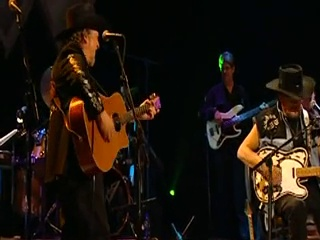

In [7]:
# from IPython.display import Image
# Image("ig.png") # replace filename.jpg with the name of your image file


In [34]:
# from PIL import Image
# # Open the image file
# with open('D:\\Major23\\test2.png', 'rb') as f:
#     img = Image.open(f)

# # Show the image
# predict_step(['D:\\Major23\\test2.png'])

['a crowd of people standing around a stage']

In [8]:
# import os
# import json

# # Assuming you have a single frame folder and ID
# image_paths = "D:\\Major23\\Filtered\\filtered_frame_video194_1.png"
# frame_id = 1

# # Assuming you have a function that can predict captions for each frame
# def predict_caption(image_paths):

#     images = []
#     for image_path in image_paths:
#       i_image = Image.open(image_paths)
#       if i_image.mode != "RGB":
#         i_image = i_image.convert(mode="RGB")

#       images.append(i_image)

#     pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)

#     output_ids = model.generate(pixel_values, **gen_kwargs)

#     preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
#     preds = [pred.strip() for pred in preds]
#     return preds
    
# # Get the predicted caption for the frame
# res = predict_caption(image_paths)

# # Create a dictionary to store the frame data
# frame_data = {
#     "folder_path": image_paths,
#     "frame_id": frame_id,
#     "caption": res
# }

# # Check if the JSON file already exists
# if os.path.exists("frames.json"):
#     # If the file exists, load the existing data
#     with open("frames.json", "r") as f:
#         frames = json.load(f)
#     # Append the new frame data to the existing data
#     frames.append(frame_data)
#     # Write the updated data back to the file
#     with open("frames.json", "w") as f:
#         json.dump(frames, f)
# else:
#     # If the file doesn't exist, create a new file and write the frame data
#     with open("frames.json", "w") as f:
#         json.dump([frame_data], f)

In [59]:
# import os
# import json
# from PIL import Image

# def predict_caption(image_paths):

#     images = []
#     for image_path in image_paths:
#       i_image = Image.open(image_paths)
#       if i_image.mode != "RGB":
#         i_image = i_image.convert(mode="RGB")

#       images.append(i_image)

#     pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)

#     output_ids = model.generate(pixel_values, **gen_kwargs)

#     preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
#     preds = [pred.strip() for pred in preds]
#     return preds

# def generate_json_file(folder_path):
#     image_data = []
#     frame_id = 1

#     # Iterate through all the files in the folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             frame_path = os.path.join(folder_path, filename)

#             # Predict caption for the frame
#             caption = predict_caption(frame_path)  # Pass the frame path as a list

#             # Create image data dictionary
#             image_info = {
#                 "folder_path": folder_path,
#                 "frame_id": frame_id,
#                 "caption": caption
#             }

#             # Add image data to the list
#             image_data.append(image_info)

#             # Increment frame ID
#             frame_id += 1

#     # Convert image data to JSON
#     json_data = json.dumps(image_data, indent=4)

#     # Write JSON data to a file
#     with open("image_frames1.json", "w") as file:
#         file.write(json_data)

# # Provide the folder path containing image frames
# folder_path = r"D:\Major23\random"  # Make sure to specify the complete folder path

# # Generate JSON file
# generate_json_file(folder_path)


In [65]:
# import os
# import json
# from PIL import Image

# def predict_caption(image_paths):

#     images = []
#     for image_path in image_paths:
#       i_image = Image.open(image_paths)
#       if i_image.mode != "RGB":
#         i_image = i_image.convert(mode="RGB")

#       images.append(i_image)

#     pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)

#     output_ids = model.generate(pixel_values, **gen_kwargs)

#     preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
#     preds = [pred.strip() for pred in preds]
#     return preds[0]

# def generate_json_file(folder_path):
#     image_data = []
#     frame_id = 1

#     # Iterate through all the files in the folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             frame_path = os.path.join(folder_path, filename)

#             # Predict caption for the frame
#             caption = predict_caption(frame_path)  # Pass the frame path as a list

#             # Create image data dictionary
#             image_info = {
#                 "folder_path": folder_path,
#                 "frame_id": frame_id,
#                 "caption": caption
#             }
#             # Increment frame ID
#             frame_id += 1

#             # Add image data to the list
#         image_data.append(image_info)

            

#     # Convert image data to JSON
#     json_data = json.dumps(image_data, indent=4)

#     # Write JSON data to a file
#     with open("image_frames1.json", "w") as file:
#         file.write(json_data)

# # Provide the folder path containing image frames
# folder_path = r"D:\Major23\Filtered"  # Make sure to specify the complete folder path

# # Generate JSON file
# generate_json_file(folder_path)


In [9]:
# import os
# import json
# from PIL import Image

# def predict_caption(image_paths):
#     images = []
#     for image_path in image_paths:
#         i_image = Image.open(image_path)
#         if i_image.mode != "RGB":
#             i_image = i_image.convert(mode="RGB")
#         images.append(i_image)

#     pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)

#     output_ids = model.generate(pixel_values, **gen_kwargs)

#     preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
#     preds = [pred.strip() for pred in preds]
#     return preds[0]

# def generate_json_file(folder_path):
#     image_data = []
#     frame_id = 1

#     # Recursive function to traverse folders inside folders
#     def traverse_folder(current_path):
#         nonlocal frame_id

#         for filename in os.listdir(current_path):
#             file_path = os.path.join(current_path, filename)

#             if os.path.isdir(file_path):
#                 # Recursively traverse subfolder
#                 traverse_folder(file_path)
#                 # Reset frame ID to 1 for each new folder
#                 frame_id = 1
#             elif filename.endswith(".jpg") or filename.endswith(".png"):
#                 # Predict caption for the frame
#                 caption = predict_caption([file_path])  # Pass the frame path as a list

#                 # Create image data dictionary
#                 image_info = {
#                     "folder_path": current_path,
#                     "frame_id": frame_id,
#                     "caption": caption
#                 }
#                 # Increment frame ID
#                 frame_id += 1

#                 # Add image data to the list
#                 image_data.append(image_info)

#     # Start traversing from the root folder
#     traverse_folder(folder_path)

#     # Convert image data to JSON
#     json_data = json.dumps(image_data, indent=4)

#     # Write JSON data to a file
#     with open("image_frames3.json", "w") as file:
#         file.write(json_data)

# # Provide the folder path containing image frames
# folder_path = r"D:\\Major23\\random"  # Make sure to specify the complete folder path

# # Generate JSON file
# generate_json_file(folder_path)


In [10]:
import os
import json
from PIL import Image

def predict_caption(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Recursive function to traverse folders inside folders
    def traverse_folder(current_path):
        nonlocal frame_id

        for filename in os.listdir(current_path):
            file_path = os.path.join(current_path, filename)

            if os.path.isdir(file_path):
                # Recursively traverse subfolder
                traverse_folder(file_path)
                # Reset frame ID to 1 for each new folder
                frame_id = 1
            elif filename.endswith(".jpg") or filename.endswith(".png"):
                # Predict caption for the frame
                caption = predict_caption([file_path])  # Pass the frame path as a list

                # Create image data dictionary
                image_info = {
                    "frame_path": current_path.replace("\\\\", "\\"),
                    "frame_id": frame_id,
                    "caption": caption
                }
                # Increment frame ID
                frame_id += 1

                # Add image data to the list
                image_data.append(image_info)

    # Start traversing from the root folder
    traverse_folder(folder_path)

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("image_frames_full.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\PreprocessDataset"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)

#2.

In [6]:
import os
import json
from PIL import Image

def predict_caption(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Recursive function to traverse folders inside folders
    def traverse_folder(current_path):
        nonlocal frame_id

        for filename in os.listdir(current_path):
            file_path = os.path.join(current_path, filename)

            if os.path.isdir(file_path):
                # Recursively traverse subfolder
                traverse_folder(file_path)
                # Reset frame ID to 1 for each new folder
                frame_id = 1
            elif filename.endswith((".jpg", ".png", ".jpeg")):
                # Predict caption for the frame
                caption = predict_caption([file_path])  # Pass the frame path as a list

                # Create image data dictionary
                image_info = {
                    "frame_path": file_path.replace("\\\\", "\\"),
                    "frame_id": frame_id,
                    "caption": caption
                }
                # Increment frame ID
                frame_id += 1

                # Add image data to the list
                image_data.append(image_info)

    # Start traversing from the root folder
    traverse_folder(folder_path)

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("Final_frames_to_json_format.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\PreprocessDataset"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)


In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
import json
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import nltk

nltk.download('punkt')
nltk.download('stopwords')


import os
os.environ['NLTK_DATA'] = 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\nltk\\tokenize'  # Replace with the actual path to your NLTK data directory


# Set the data directory explicitly
nltk.data.path.append("C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json")  # Replace with the actual path to the data directory

# Download the stopwords resource
nltk.download('stopwords', download_dir="C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json")  # Replace with the same path as above

# Load pre-trained CNN model (e.g., ResNet50)
cnn_model = ResNet50(weights='imagenet')
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

# Load JSON file containing captions and frame information
with open('C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\image_frames_full.json', 'r') as f:
    captions_data = json.load(f)

# Preprocess captions
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

captions = []
frame_ids = []
for item in captions_data:
    caption = item['caption']
    frame_id = item['frame_id']
    caption = ' '.join([ps.stem(word.lower()) for word in nltk.word_tokenize(caption) if word.lower() not in stop_words])
    captions.append(caption)
    frame_ids.append(frame_id)

# Compute TF-IDF vectors for captions
vectorizer = TfidfVectorizer()
caption_vectors = vectorizer.fit_transform(captions)

# Process user query
query = input("a dog that is standing in the sand")
preprocessed_query = ' '.join([ps.stem(word.lower()) for word in nltk.word_tokenize(query) if word.lower() not in stop_words])
query_vector = vectorizer.transform([preprocessed_query])

# Calculate similarity scores between query and captions
similarity_scores = cosine_similarity(query_vector, caption_vectors)

# Sort captions based on similarity scores
sorted_indices = np.argsort(similarity_scores, axis=1)[0][::-1]

# Retrieve frame IDs of matching captions
matching_frame_ids = [frame_ids[index] for index in sorted_indices]

# Create directory to store matching frames
os.makedirs('matching_frames', exist_ok=True)

# Retrieve corresponding image frames
for frame_id in matching_frame_ids:
    frame_path = os.path.join('image_frames', frame_id + '.jpg')  # Replace with the actual path to the image frames directory
    if os.path.exists(frame_path):
        img = image.load_img(frame_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocessed_query(img)
        img_embedding = feature_extractor.predict(img)

        # Save the image frame to a separate file
        save_path = os.path.join('matching_frames', frame_id + '.jpg')
        image.save_img(save_path, img[0])

        # Optionally, save the image embedding to a separate file
        # np.save('matching_frames_embeddings/' + frame_id + '.npy', img_embedding)
    else:
        print(f"Frame with ID '{frame_id}' does not exist.")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\Desktop\SCET_Major\frmes to json...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import os
import json
import torch
from PIL import Image
from torchvision.transforms import transforms
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Set the paths to the dataset, JSON file, and the destination folder for matching frames
dataset_path = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\PreprocessDataset"
json_file_path = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\image_frames_full.json"
output_folder_path = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\Next Half-frames part2"

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load and preprocess the JSON file
with open(json_file_path, "r") as file:
    data = json.load(file)

# Process the text query
query = "a dog that is standing in the sand"
query_tokens = tokenizer.encode(query, add_special_tokens=True)
query_input = torch.tensor([query_tokens]).to(device)

# Iterate through each image-caption pair
for item in data:
    image_path = os.path.join(dataset_path, item["folder_path"])
    image = Image.open(image_path).convert("RGB")
    image = transforms.ToTensor()(image).unsqueeze(0).to(device)

    # Extract image features using BERT
    with torch.no_grad():
        image_features = model(image)[0]

    # Compute the similarity between the query and caption
    caption_tokens = tokenizer.encode(item["caption"], add_special_tokens=True)
    caption_input = torch.tensor([caption_tokens]).to(device)

    with torch.no_grad():
        caption_features = model(caption_input)[0]

    similarity = cosine_similarity(image_features, caption_features).item()

    # If the similarity exceeds a certain threshold, save the matching frame
    similarity_threshold = 0.8
    if similarity > similarity_threshold:
        output_filename = os.path.basename(image_path)
        output_path = os.path.join(output_folder_path, output_filename)
        image.save(output_path)

print("Matching frames have been saved successfully.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\image_frames_full.json'

In [1]:
pip install torchvision

  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# frame store to folder

In [2]:
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load the text query and frame.json file
with open('/kaggle/input/frames-jsonfile/image_frames_for3Videos.json', 'r') as f:
    frame_data = json.load(f)

text_query = "a dog that is standing in the sand"  # replace with your actual text query

# Initialize NLTK tools
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocess the text query
query_words = [stemmer.stem(word.lower()) for word in text_query.split() if word.lower() not in stop_words]
query = " ".join(query_words)

# Preprocess the frame captions and build the corpus
corpus = []
for frame in frame_data:
    caption = frame['caption']
    caption_words = [stemmer.stem(word.lower()) for word in caption.split() if word.lower() not in stop_words]
    caption_processed = " ".join(caption_words)
    corpus.append(caption_processed)

# Vectorize the corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Split the corpus into training and testing sets
y = [frame['caption'] for frame in frame_data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier on the training set
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the relevance of the frames using the trained classifier
frame_predictions = clf.predict(X)

# Move the relevant frames to a "relevant frames" folder
if not os.path.exists("relevant frames"):
    os.makedirs("relevant frames")

for i, frame in enumerate(frame_data):
    if frame_predictions[i] == 1:
        frame_path = frame['frame_path']
        os.rename(frame_path, os.path.join("relevant frames", os.path.basename(frame_path)))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# import os
# import json
# import shutil

# # Load the frame.json file and the text query
# with open('/kaggle/input/frames-jsonfile/image_frames_for3Videos.json', 'r') as f:
#     frame_data = json.load(f)

# text_query = "a dog that is standing in the sand"  # replace with your actual text query

# # Create a list to hold the relevant frames
# relevant_frames = []

# # Iterate over each frame in frame.json
# for frame in frame_data:
#     caption = frame['caption']
#     if text_query in caption:
#         relevant_frames.append(frame)
#         if len(relevant_frames) >= 20:
#             break

# # Copy the relevant frames to a new folder
# if not os.path.exists("relevant_frames_new"):
#     os.makedirs("relevant_frames_new")

# for i, frame in enumerate(relevant_frames):
#     frame_path = frame['folder_path']
#     new_frame_path = os.path.join("relevant_frames_new", f"frame_{i}.jpg")
#     shutil.copy(frame_path, new_frame_path)


In [7]:
from PIL import Image
import os

# Load the first image in the relevant_frames directory and display it
filename = os.listdir("relevant_frames_new")[0]
if filename.endswith(".jpg"):
    filepath = os.path.join("relevant_frames_new", filename)
    image = Image.open(filepath)
    image.show()


IndexError: list index out of range

In [133]:
import json
import torch
from transformers import AutoTokenizer, AutoModel

# Load the JSON file
with open("/kaggle/input/frames-jsonfile/image_frames_for3Videos.json", "r") as f:
    frames = json.load(f)

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Specify the ID of the frame to preprocess
frame_id = "1"

# Find the frame with the specified ID
for frame in frames:
    if frame["frame_id"] == frame_id:
        caption = frame["caption"]
        input_ids = torch.tensor([tokenizer.encode(caption, add_special_tokens=True)])
        with torch.no_grad():
            features = model(input_ids)[0][:, 0, :].numpy()
        frame["caption_features"] = features.tolist()
        break

# Save the updated frames to a new file
with open("processed_frames.json", "w") as f:
    json.dump(frames, f)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [134]:
import json
import torch
from transformers import AutoTokenizer, AutoModel

# Load the JSON file
with open("/kaggle/input/frames-jsonfile/image_frames_for3Videos.json", "r") as f:
    frames = json.load(f)

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Preprocess the captions for each frame and store the features in the same file
for frame in frames:
    caption = frame["caption"]
    input_ids = torch.tensor([tokenizer.encode(caption, add_special_tokens=True)])
    with torch.no_grad():
        features = model(input_ids)[0][:, 0, :].numpy()
    frame["caption_features"] = features.tolist()

# Save the updated frames to the same file
with open("frame.json", "w") as f:
    json.dump(frames, f)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# # # **Here, we will search for relevent frames by writing a text query**

In [11]:
import json
import numpy as np
#import tensorflow.keras.preprocessing.sequence
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
#import keras.preprocessing.sequence.pad_sequences


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [15]:
# Load JSON file containing captions
with open('/kaggle/input/frames-jsonfile/image_frames_for3Videos.json', 'r') as f:
    captions = json.load(f)

# Extract text and frames from captions
captions_text = [caption['caption'] for caption in captions]
captions_frame_paths = [caption['folder_path'] for caption in captions]

# Tokenize captions text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions_text)
captions_sequences = tokenizer.texts_to_sequences(captions_text)


In [16]:


# Tokenize captions text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions_text)
captions_sequences = tokenizer.texts_to_sequences(captions_text)

# Pad sequences to a fixed length
max_sequence_length = max(len(seq) for seq in captions_sequences)
padded_captions_sequences = pad_sequences(captions_sequences, maxlen=max_sequence_length)




In [17]:

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=128))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(padded_captions_sequences, np.zeros(len(captions)), epochs=5, batch_size=32)

Epoch 1/5
7/7 [==============================] - 3s 28ms/step - loss: 9.5593e-05
Epoch 2/5
7/7 [==============================] - 0s 26ms/step - loss: 2.5246e-05
Epoch 3/5
7/7 [==============================] - 0s 25ms/step - loss: 8.7810e-06
Epoch 4/5
7/7 [==============================] - 0s 26ms/step - loss: 8.4441e-06
Epoch 5/5
7/7 [==============================] - 0s 26ms/step - loss: 3.3016e-06


In [23]:
# Define a query
query = "a man in a band playing a guitar"

# Tokenize and pad the query
query_sequence = tokenizer.texts_to_sequences([query])
padded_query_sequence = pad_sequences(query_sequence, maxlen=max_sequence_length)

In [25]:
import os
import shutil

# Directory to store relevant frames
relevant_frames_dir = '/kaggle/input/relevant-frame/relevant_frames'

# Use the model to predict the caption with the highest similarity score
similarity_scores = model.predict(padded_captions_sequences)
max_index = np.argmax(similarity_scores)

start_index = max_index + 1
end_index = min(start_index + 20, len(captions))
relevant_frame_paths = [frame_path for frames in captions_frame_paths[start_index:end_index] for frame_path in frames]

# Construct file paths for relevant frames
frame_dir = '/kaggle/input/2videoframe/2VideosFrames'
for root, dirs, files in os.walk(frame_dir):
    for file in files:
        if file in relevant_frame_paths:
            frame_path = os.path.join(root, file)
            frame_filename = os.path.basename(frame_path)
            destination_path = os.path.join(relevant_frames_dir, frame_filename)
            shutil.copy(frame_path, destination_path)


7/7 [==============================] - 0s 12ms/step


In [126]:
import os
import shutil

# Use the model to predict the caption with the highest similarity score
similarity_scores = model.predict(padded_captions_sequences)
max_index = np.argmax(similarity_scores)

start_index = max_index + 1
end_index = min(start_index + 20, len(captions))
relevant_frame_paths = [frame_path for frames in captions_frame_paths[start_index:end_index] for frame_path in frames]

# Create a folder to store the relevant frames
relevant_frames_dir = 'relevant_frames'
os.makedirs(relevant_frames_dir, exist_ok=True)

# Copy relevant frames to the new folder
for frame_path in relevant_frame_paths:
    src_path = os.path.join(frame_dir, frame_path)
    dst_path = os.path.join(relevant_frames_dir, os.path.basename(frame_path))
    shutil.copy(src_path, dst_path)


7/7 [==============================] - 0s 13ms/step


IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:
import os
import shutil

# Directory to store relevant frames
relevant_frames_dir = '/kaggle/working/relevant_frames'

if not os.path.exists(relevant_frames_dir):
    os.makedirs(relevant_frames_dir)

# Use the model to predict the caption with the highest similarity score
similarity_scores = model.predict(padded_captions_sequences)
max_index = np.argmax(similarity_scores)

start_index = max_index + 1
end_index = min(start_index + 20, len(captions))
relevant_frame_paths = [frame_path for frames in captions_frame_paths[start_index:end_index] for frame_path in frames]

# Copy relevant frames to new directory
for frame_path in relevant_frame_paths:
    frame_filename = os.path.basename(frame_path)
    source_path = os.path.join(frame_dir, frame_path)
    destination_path = os.path.join(relevant_frames_dir, frame_filename)
    shutil.copy(source_path, destination_path)


In [ ]:
# Use the model to predict the caption with the highest similarity score
similarity_scores = model.predict(padded_captions_sequences)
max_index = np.argmax(similarity_scores)

start_index = max_index + 1
end_index = min(start_index + 20, len(captions))
relevant_frame_paths = [frame_path for frames in captions_frame_paths[start_index:end_index] for frame_path in frames]

# Construct file paths for relevant frames
frame_dir = '/kaggle/input/2videoframe/2VideosFrames'
relevant_frame_file_paths = []
for frame_path in relevant_frame_paths:
    source_path = os.path.join(frame_dir, frame_path)
    if os.path.isfile(source_path):
        relevant_frame_file_paths.append(source_path)

# Copy relevant frames to new directory
relevant_frames_dir = '/kaggle/working/relevant_frames'
if not os.path.exists(relevant_frames_dir):
    os.makedirs(relevant_frames_dir)

for frame_path in relevant_frame_file_paths:
    frame_filename = os.path.basename(frame_path)
    destination_path = os.path.join(relevant_frames_dir, frame_filename)
    shutil.copy(frame_path, destination_path)


In [19]:
import os


In [98]:
import cv2

# Assuming relevant_frame_file_paths contains the list of file paths for relevant frames
for frame_path in relevant_frame_file_paths:
    # Read the image file
    frame = cv2.imread(frame_path)

    # Check if the frame has a valid size
    if frame is not None and frame.shape[0] > 0 and frame.shape[1] > 0:
        # Show the image file
        cv2.imshow('Relevant Frame', frame)
        cv2.waitKey(0)

        # Save the image file
        cv2.imwrite('relevant_frames/' + os.path.basename(frame_path), frame)
    else:
        print(f"Error: Invalid frame size for {frame_path}")


Error: Invalid frame size for /
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/k
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/a
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/g
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/g
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/l
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/e
Error: Invalid frame size for /
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/i
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/n
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/p
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/u
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/t
Error: Invalid frame size for /
Error: Invalid frame size for /kaggle/input/2videoframe/2VideosFrames/2
Error: Invalid frame size for /kaggle/in

In [23]:
print('/kaggle/input/2videoframe/2VideosFrames/k'

/kaggle/input/2videoframe/2VideosFrames/k


In [24]:
from IPython.display import Image
Image('/kaggle/input/2videoframe/2VideosFrames/k') # replace filename.jpg with the name of your image file


FileNotFoundError: No such file or directory: '/kaggle/input/2videoframe/2VideosFrames/k'

FileNotFoundError: No such file or directory: '/kaggle/input/2videoframe/2VideosFrames/k'

<IPython.core.display.Image object>

In [99]:
import json
import numpy as np
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import os
import shutil

In [100]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [102]:
with open('/kaggle/input/frames-jsonfile/image_frames_for3Videos.json', 'r') as f:
    captions = json.load(f)

In [104]:
# Extract text and frames from captions
captions_text = [caption['caption'] for caption in captions]
captions_frame_paths = [caption['folder_path'] for caption in captions]

In [105]:
# Tokenize captions text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions_text)
captions_sequences = tokenizer.texts_to_sequences(captions_text)

In [106]:
# Pad sequences to a fixed length
max_sequence_length = max(len(seq) for seq in captions_sequences)
padded_captions_sequences = pad_sequences(captions_sequences, maxlen=max_sequence_length)

In [107]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=128))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))


In [108]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [109]:
# Train the model
model.fit(padded_captions_sequences, np.zeros(len(captions)), epochs=5, batch_size=32)


Epoch 1/5
7/7 [==============================] - 3s 28ms/step - loss: 8.8766e-05
Epoch 2/5
7/7 [==============================] - 0s 27ms/step - loss: 3.1176e-05
Epoch 3/5
7/7 [==============================] - 0s 29ms/step - loss: 1.5730e-05
Epoch 4/5
7/7 [==============================] - 0s 30ms/step - loss: 9.6196e-06
Epoch 5/5
7/7 [==============================] - 0s 28ms/step - loss: 3.4668e-06


In [110]:
# Define a query
query = "a man in a band playing a guitar"


In [112]:
# Tokenize and pad the query
query_sequence = tokenizer.texts_to_sequences([query])
padded_query_sequence = pad_sequences(query_sequence, maxlen=max_sequence_length)



In [113]:

# Get the embeddings for the captions and the query
captions_embeddings = model.predict(padded_captions_sequences)
query_embedding = model.predict(padded_query_sequence)[0]

1/1 [==============================] - 0s 37ms/step


In [115]:
# Calculate cosine similarities between the query and captions
cosine_similarities = np.dot(captions_embeddings, query_embedding) / (np.linalg.norm(captions_embeddings, axis=1) * np.linalg.norm(query_embedding))


In [116]:
# Get the indices of the 20 most similar captions
relevant_captions_indices = np.argpartition(cosine_similarities, -20)[-20:]


In [117]:
# Get the relevant frame paths
relevant_frame_paths = []
for i in relevant_captions_indices:
    relevant_frame_paths += captions_frame_paths[i]


In [118]:
import os
import shutil

# Directory to store relevant frames
relevant_frames_dir = '/kaggle/working/'

# Use the model to predict the caption with the highest similarity score
similarity_scores = model.predict(padded_captions_sequences)
max_index = np.argmax(similarity_scores)

start_index = max_index + 1
end_index = min(start_index + 20, len(captions))
relevant_frame_paths = [frame_path for frames in captions_frame_paths[start_index:end_index] for frame_path in frames]

# Construct file paths for relevant frames
frame_dir = '/kaggle/input/2videoframe/2VideosFrames'
for root, dirs, files in os.walk(frame_dir):
    for file in files:
        if file in relevant_frame_paths:
            frame_path = os.path.join(root, file)
            frame_filename = os.path.basename(frame_path)
            destination_path = os.path.join(relevant_frames_dir, frame_filename)
            shutil.copy(frame_path, destination_path)
            
            
            # Output the relevant frames
            relevant_frames = []
            for frame_path in relevant_frame_paths:
                with open(frame_path, 'rb') as f:
                    relevant_frames.append(f.read())


7/7 [==============================] - 0s 13ms/step


In [132]:
relevant_frames

[b'{\n  "cells": [],\n  "metadata": {\n    "language_info": {\n      "name": "none",\n      "version": "0"\n    },\n    "kernelspec": {\n      "display_name": "Python 3",\n      "language": "python",\n      "name": "python3"\n    }\n  },\n  "nbformat": 4,\n  "nbformat_minor": 4\n}']

In [131]:
import os
relevant_frames_dir = '/kaggle/working/'
print(os.listdir(relevant_frames_dir))

['__notebook_source__.ipynb', '.virtual_documents', 'relevant_frames']


In [95]:
# Construct file paths for relevant frames
frame_dir = '/kaggle/input/2videoframe/2VideosFrames'
relevant_frames_dir = '/kaggle/working/'
for root, dirs, files in os.walk(frame_dir):
    for file in files:
        if file in relevant_frame_paths:
            frame_path = os.path.join(root, file)
            frame_filename = os.path.basename(frame_path)
            destination_path = os.path.join(relevant_frames_dir, frame_filename)
            shutil.copy(frame_path, destination_path)
            
# Output the relevant frames
relevant_frames = []
for frame_path in relevant_frame_paths:
    with open(frame_path, 'rb') as f:
        relevant_frames.append(f.read())

IsADirectoryError: [Errno 21] Is a directory: '/'